
# unsupervised Learning - k_means clustering


In [1]:

# Ausführen, für den Fall, dass  Warnungen ignoriert werden sollen
# rosa warnungen werden nicht ausgegeben!
import warnings
warnings.filterwarnings('ignore')


In [2]:
# bibliotheken importieren:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs


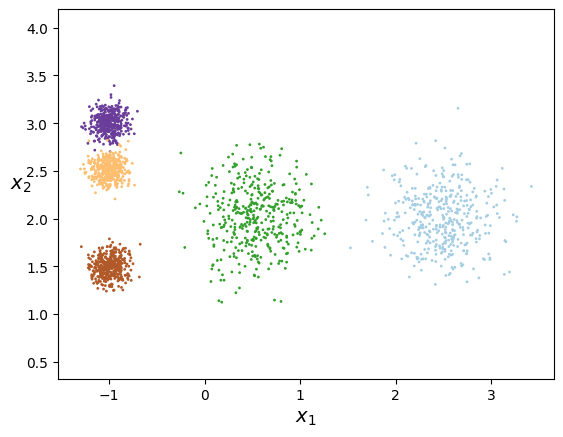

In [3]:

# Künstlich erzeugte Zentren
# cluster_zentren --> anfangszentroiden:
blob_centers = np.array(
    [[2.5,  2],
     [0.5 ,  2],
     [-1,  2.5],
     [-1,  3],
     [-1,  1.5]])
# abweichung von den cluster_zentren --> anfangszentroiden:
blob_std = np.array([0.3, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=42)


plt.scatter(X[:, 0], X[:, 1], c=y, s=1, cmap=plt.cm.Paired)
plt.axis("equal")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()


In [4]:

# algorithmus trainiert mit X-daten und trifft vorhersagen (y-daten werden ignoriert):
from sklearn.cluster import KMeans
# number of cluster
k = 5
kmeans5 = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans5.fit_predict(X)


In [5]:

# Die folgenden 5 Zentren (d. h. Clusterzentren) wurden gefunden.
# --> vorhersagen für die blob_centers
#np.array(
    #[[2.5,  2],
     #[0.5 ,  2],
     #[-1,  2.5],
     #[-1,  3],
     #[-1,  1.5]])
kmeans5.cluster_centers_


array([[ 0.53861704,  2.01819299],
       [-0.99298666,  1.49773443],
       [ 2.49183738,  2.00342395],
       [-1.00173931,  2.99962037],
       [-1.00220491,  2.50534332]])

In [6]:

# Wir können nun für beliebige Punkte die zugehörigen Cluster vorhersagen.
X_new = np.array([[0, 2], [3, 2], [-1, 3]])
kmeans5.predict(X_new)


array([0, 2, 3])

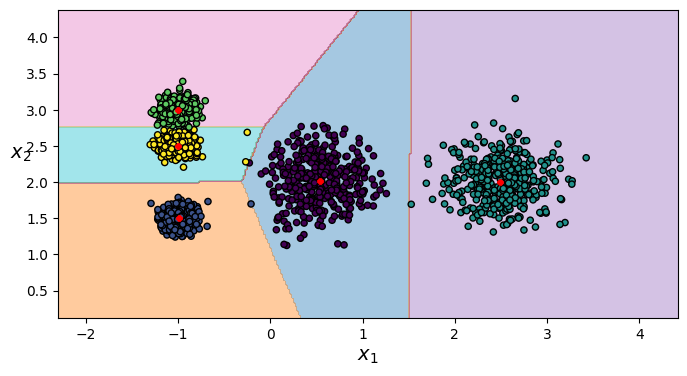

In [7]:

# anzeigen der clustergrenzen:
def plot_data(X, model = None):
    if model:
        plt.scatter(X[:, 0], X[:, 1], c=model.labels_, s=20, edgecolors='k')
    else:
        plt.plot(X[:, 0], X[:, 1], 'k.', markersize=3)
    
def plot_centroids(model):
    centroids = model.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=10, linewidths=3, color='r', zorder=10)


def plot_decision_boundaries(X, model, 
                             show_centroids=True, 
                             show_xlabels=True, 
                             show_ylabels=True, 
                             color_points = True
                            ):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='tab10')
    
    if color_points:
        plot_data(X, model)
    else:
        plot_data(X)
    
    if show_centroids:
        plot_centroids(model)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_decision_boundaries(X, kmeans5)


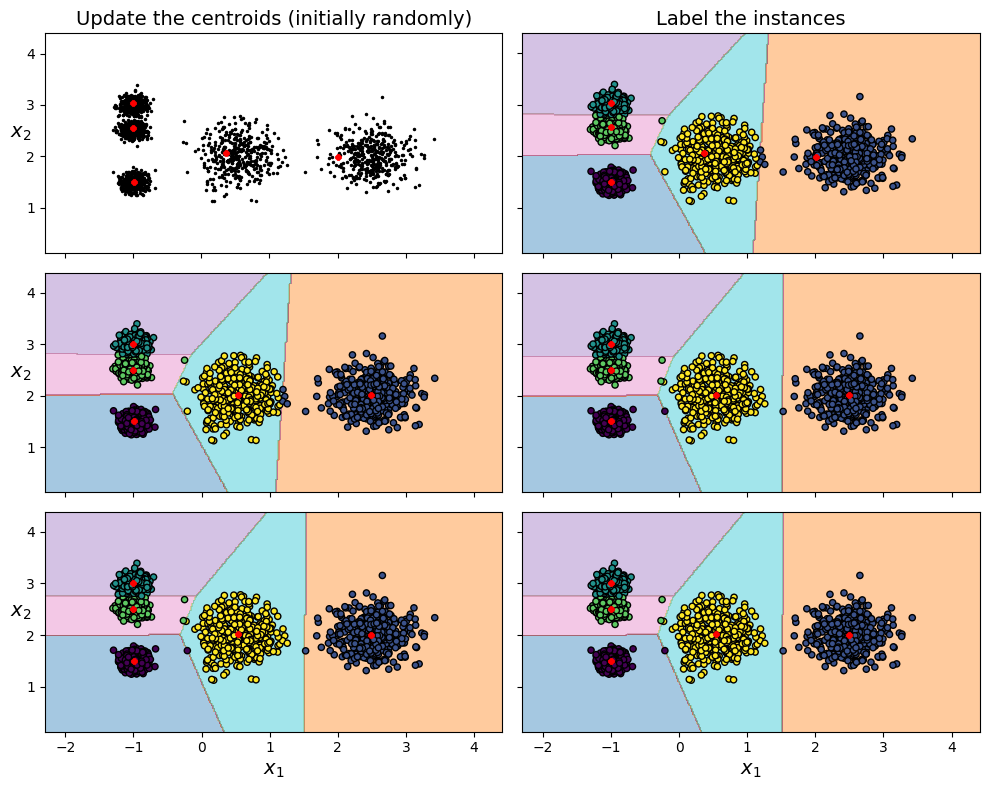

In [8]:

# man beginnt einfach damit, die Zentroide zufällig zu platzieren (z.B. indem man k Instanzen zufällig auswählt
# und ihre Positionen als Zentroide verwendet). Dann beschriftet man die Instanzen, aktualisiert die Zentroide,
# beschriftet die Instanzen, aktualisiert die Zentroide und so weiter, bis sich die Zentroide nicht mehr bewegen.
# Wir können uns die erste Schritte visualisieren:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=5, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=10, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)


plt.subplot(322)
plot_decision_boundaries(X, kmeans_iter1, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(X, kmeans_iter1,  show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2)

plt.subplot(324)
plot_decision_boundaries(X, kmeans_iter2, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(X, kmeans_iter2,  show_centroids=False)
plot_centroids(kmeans_iter3)

plt.subplot(326)
plot_decision_boundaries(X, kmeans_iter3,  show_ylabels=False)
plt.tight_layout()
plt.show()


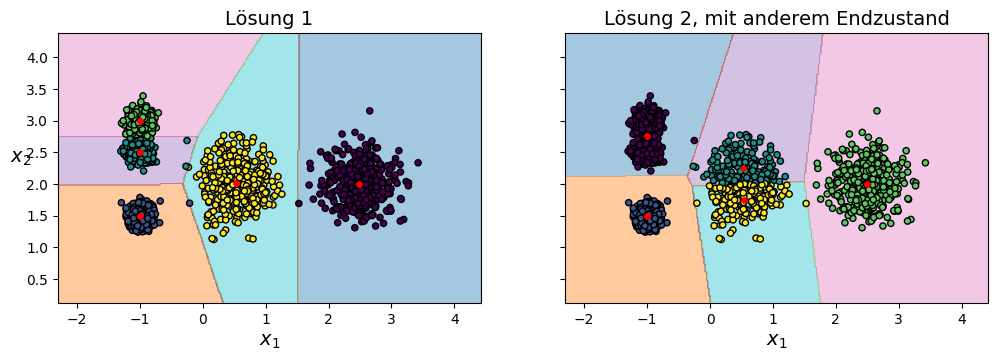

In [9]:

# lösung rechts ist ungünstig, da clustergrenzen sich neu formieren!
# random_state teilt die daten unterschiedlich auf!!
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=42)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=5)

kmeans_rnd_init1.fit(X)
kmeans_rnd_init2.fit(X)

plt.figure(figsize=(12, 3.5))

plt.subplot(121)
plot_decision_boundaries(X, kmeans_rnd_init1)
plt.title('Lösung 1', fontsize=14)

plt.subplot(122)
plot_decision_boundaries(X, kmeans_rnd_init2,show_ylabels=False)
plt.title('Lösung 2, mit anderem Endzustand', fontsize=14)
plt.show()



# Zentroid-Initialisierungsmethoden


In [10]:

# parameter für anfangszentroid muß günstig gewählt sein:
# --> Zentroid-Initialisierungsmethoden
#                      --> vorausgewählt: k_means++ --> beste ergebnisse!!!
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)


In [11]:

# standardwert für n_init = 10:
kmeans = KMeans(n_clusters=5, n_init=50)


mini-Batch Inertia: 164.8297741147436


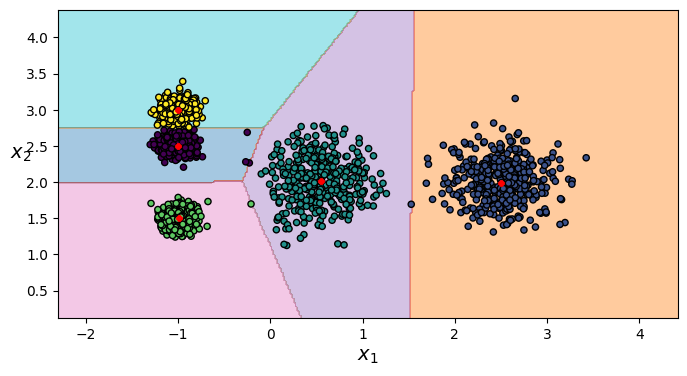

In [12]:

# mini-batch-algorithmus --> kleine teilmengen statt den ganzen datensatz für initialisierung zentroide
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)
print('mini-Batch Inertia:', minibatch_kmeans.inertia_)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(X, minibatch_kmeans)


In [13]:

# zeitvergleich k_means und mini-batch:
%timeit KMeans(n_clusters=100, random_state=42).fit(X)
%timeit MiniBatchKMeans(n_clusters=100, random_state=42).fit(X)


420 ms ± 25.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
123 ms ± 7.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)



# optimale anzahl von clustern:


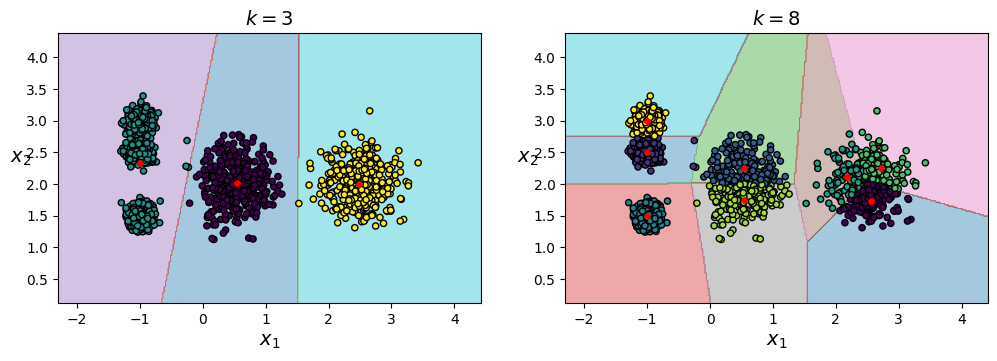

In [14]:

kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans8 = KMeans(n_clusters=8, random_state=42)

kmeans3.fit(X)
kmeans8.fit(X)

plt.figure(figsize=(12, 3.5))

plt.subplot(121)
plot_decision_boundaries(X, kmeans3)
plt.title('$k = 3$', fontsize=14)

plt.subplot(122)
plot_decision_boundaries(X, kmeans8)
plt.title('$k = 8$', fontsize=14)
plt.show()


In [15]:

# trägheitswert inertia
print('k = 3:', kmeans3.inertia_)
print('k = 5:', kmeans5.inertia_)
print('k = 8:', kmeans8.inertia_)


k = 3: 635.0256318828214
k = 5: 164.72424553703047
k = 8: 100.38104978332899


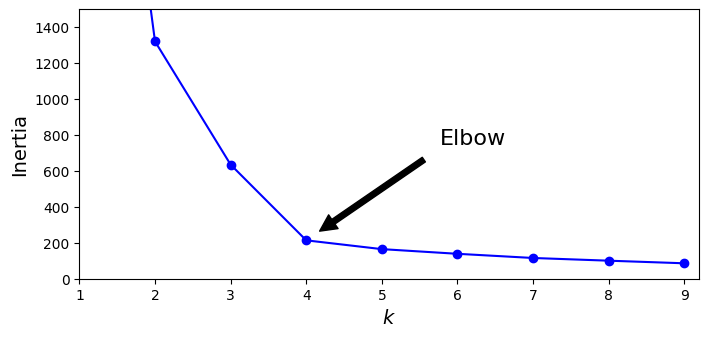

In [16]:

# trägheit in form einer funktion
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 9.2, 0, 1500])
plt.show()


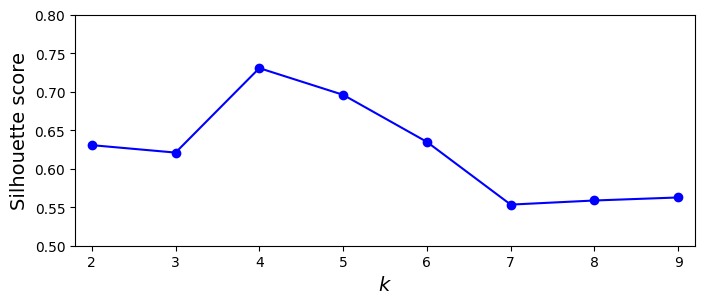

In [17]:

# sichere methode zur berechnung des optimalen k:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 9.2, 0.5, 0.8])
plt.show()


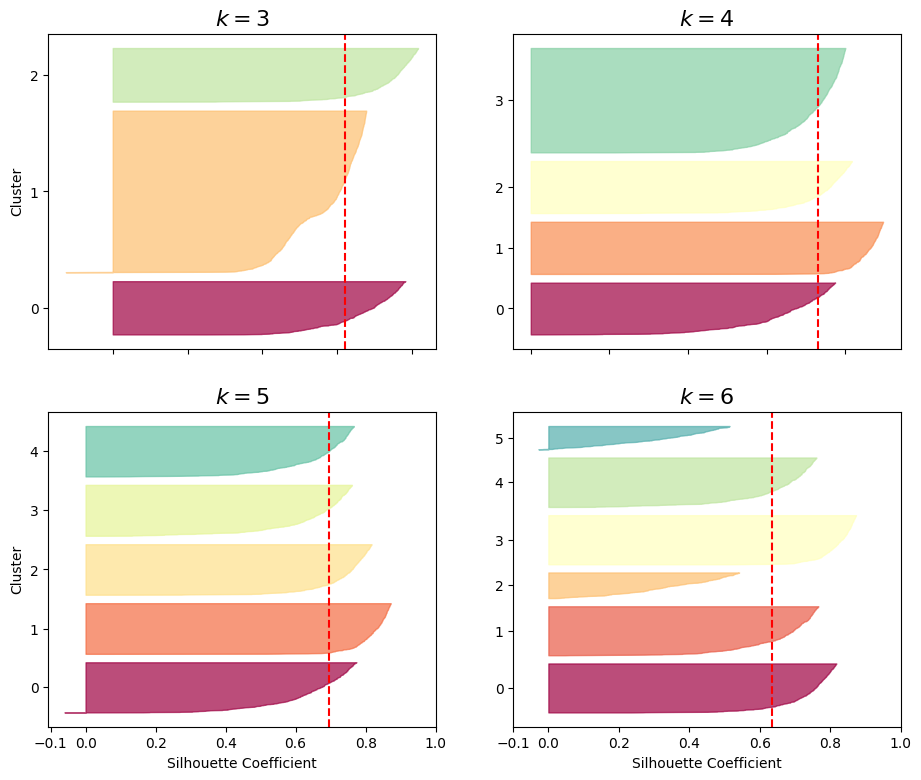

In [18]:

# Silhouetten-Diagrammen können wir die beste Anzahl von Clustern bestimmen (breiter --> besser!)
# diagramm soll scoregrenze (gestrichelt) zumindest überschreiten!
from sklearn.metrics import silhouette_samples
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()



# Clustering für Bildsegmentierung


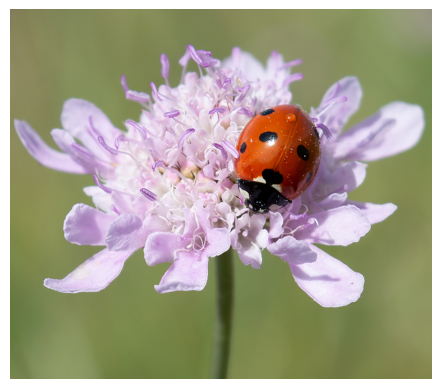

Image Shape: (702, 800, 3)


In [19]:

from matplotlib.image import imread
import urllib.request

image_url = "https://upload.wikimedia.org/wikipedia/commons/1/15/Coccinella_septempunctata%2C_Nea_Makri%2C_Greece.jpg"

with urllib.request.urlopen(image_url) as url:
    image = imread(url, format='jpg')
plt.imshow(image)
plt.axis('off') 
plt.show()

print('Image Shape:', image.shape)


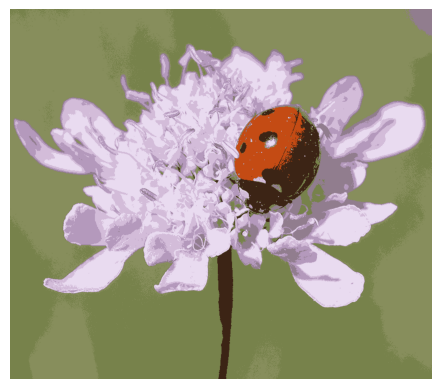

In [20]:

# segmentieren:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

plt.imshow(segmented_img.astype('uint8'))
plt.axis('off') 
plt.show()


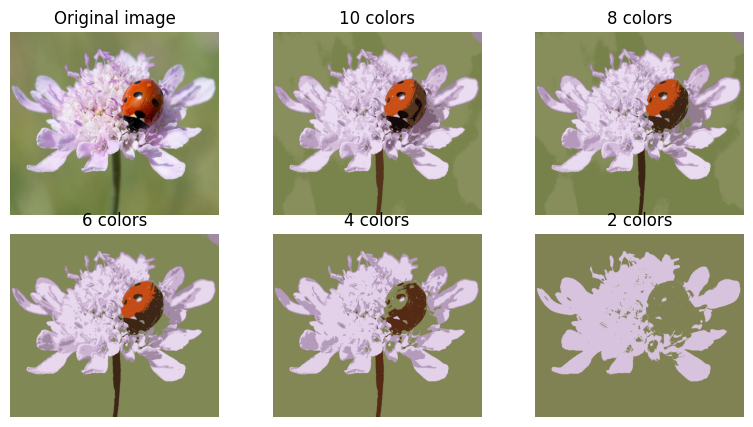

In [21]:

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx].astype('uint8'))
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()


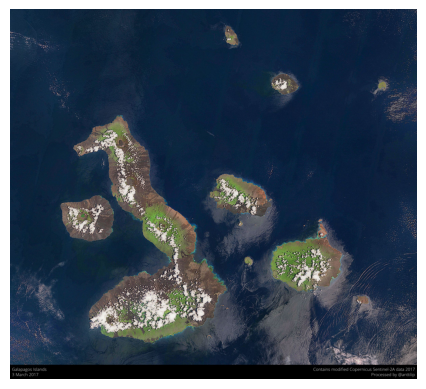

Image Shape: (2184, 2400, 3)


In [22]:

# Satelliten Bilder zu ausprobieren. Kann aber etwas länger dauern
galapagos = "https://upload.wikimedia.org/wikipedia/commons/c/cc/Galapagos_Islands_2017_03_03_%2832905506520%29.jpg"

with urllib.request.urlopen(galapagos) as url:
    image = imread(url, format='jpg')
plt.imshow(image)
plt.axis('off') 
plt.show()
print('Image Shape:', image.shape)



# k-Means für Dimensionsreduktion


In [23]:

# logReg:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

log_reg_score = log_reg.score(X_test, y_test)
log_reg_score


0.9688888888888889

In [24]:

# k_means:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

pipeline_score = pipeline.score(X_test, y_test)
pipeline_score


0.9733333333333334


# Semi-Supervised Learning mit k-Means


In [25]:

# 50 gelabelte instanzen:
n_labeled = 50

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)


0.8333333333333334

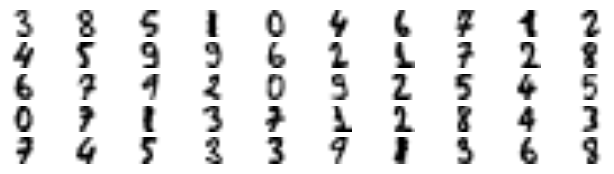

In [26]:

# trainingsmenge in 50 cluster einteilen:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()


In [27]:

# diese representanten mit einem label versehen:
y_representative_digits = y_train[representative_digit_idx]
y_representative_digits


array([3, 8, 5, 1, 0, 4, 6, 7, 1, 2, 4, 5, 9, 9, 6, 2, 1, 7, 2, 8, 6, 7,
       9, 2, 0, 9, 2, 5, 4, 5, 0, 7, 1, 3, 7, 1, 2, 8, 4, 3, 7, 4, 5, 3,
       3, 9, 1, 3, 6, 8])

In [28]:

# verbesserung:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)


0.8955555555555555

In [29]:

# die Labels auf alle anderen Instanzen im selben Cluster übertragen:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

log_reg.score(X_test, y_test)


0.9288888888888889